# Assignment 1: ML Engineering 1

In [1]:
# enter your name and UFL email address
name = 'Yang Bai'
email = 'baiyang94@ufl.edu'

In [2]:
if name == 'enter your name' or email == 'enter your email':
    assert False, 'Enter your name & email first!'
else:
    print('Assignment 1 -- name: {}, email: {}\n'.format(name, email))
    
    # Load packages we need
    import sys
    import os
    import time
    import tempfile 

    import numpy as np
    import pandas as pd

    from matplotlib import pyplot as plt
    plt.rcParams.update({'font.size': 16})

    import tensorflow as tf


    # Let's check our software versions
    print('### Python version: ' + __import__('sys').version)
    print('### TF version: ' + tf.__version__)
    print('### Keras version: ' + tf.keras.__version__)
    print('------------')


    # load our packages / code
    sys.path.insert(1, '../common/')
    import utils
    import plots

Assignment 1 -- name: Yang Bai, email: baiyang94@ufl.edu

### Python version: 3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
### TF version: 2.4.0
### Keras version: 2.4.0
------------


In [3]:
# global parameters to control behavior of the pre-processing, ML, analysis, etc.
seed = 17

# deterministic seed for reproducibility
np.random.seed(seed)

## Part 1: Loading and Pre-processing Data

### Loading data

In [4]:
# Use pandas to load the data from compressed CSV
df1 = pd.read_csv('../data/adult.data.gz', compression='gzip', header=0, na_values='?', sep=' *, *', skipinitialspace=True, engine='python')
df2 = pd.read_csv('../data/adult.test.gz', compression='gzip', header=0, na_values='?',sep=' *, *', skipinitialspace=True, engine='python')

In [5]:
# Check that we loaded the data as expected
df1_expected_shape = (32561,15)
df2_expected_shape = (16281,15)

assert df1.shape == df1_expected_shape, 'Unexpected shape of df1!'
assert df2.shape == df2_expected_shape, 'Unexpected shape of df2!'

In [6]:
# Merge df1 and df2 for pre-processing and cleaning
dfraw = df1.append(df2, ignore_index=True, sort=False)
assert dfraw.shape == (df1_expected_shape[0]+df2_expected_shape[0],15)

### Cleaning & pre-processing data

In [7]:
## header right now: age (num), workclass (cat), fnlwgt (num), education (cat) education-num (num), marital-status (cat), occupation (cat), relationship (cat), race (cat), sex (cat), capital-gain (num), capital-loss (num), hours-per-week (num), native-country (cat), income (cat)
dfraw.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
# Let's start cleaning up the data
df = dfraw.copy()

# Let's get rid of the record weights 'fnlwgt' and 'education' (which contains same information as 'education-num')
if 'fnlwgt' in df.columns:
    df = df.drop('fnlwgt', axis=1)
if 'education' in df.columns:
    df = df.drop('education', axis=1)

# remove rows with NaN
df = df.dropna(axis=0)

In [9]:
# Now we need to recode the categorical attributes
workclass_list = ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

marital_status_list = ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']

occupation_list = ['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving' ]
    
relationship_list = ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']

race_list =['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White' ]

sex_list = ['Male', 'Female']

native_country_list = ['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic',
        'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece',
        'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary',
        'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico',
        'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland',
        'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand',
        'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']

income_list = ['<=50K', '>50K']

cat_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
cat_lists = [workclass_list, marital_status_list, occupation_list, relationship_list, race_list, sex_list, native_country_list, income_list]

# first make all the numerical cols integers
is_cat = []
for col_name in df.columns:
    cat = True
    if not col_name in cat_cols:
        df[col_name] = df[col_name].astype(float)
        cat = False
    is_cat.append(cat)

# encode categorical
for i, col_name in enumerate(cat_cols):
    df[col_name] = df[col_name].apply(lambda v: cat_lists[i].index(v))
    df[col_name] = df[col_name].astype(int)
    
# print("df['education-num']: ", df['education-num'])
# finally, make education-num 0 based and integer
df['education-num'] = (df['education-num']-1).astype(int)
# print("(df['education-num']-1).astype(int): ", df['education-num'])
    
    
is_cat = [True if col_name in cat_cols else False for col_name in df.columns]
is_cat[2] = True # education num
col_names = df.columns
print(type(col_names))
print(col_names)
col_names = [c for c in df.columns]
print(col_names)

<class 'pandas.core.indexes.base.Index'>
Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')
['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


## [Task 1] (15 points) Let's look at our data!

### [Task 1a] (5 points) Display some info about our DataFrame (df).

In [10]:
###* Put your code below (hint: 1 line) *###
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  float64
 1   workclass       45222 non-null  int64  
 2   education-num   45222 non-null  int64  
 3   marital-status  45222 non-null  int64  
 4   occupation      45222 non-null  int64  
 5   relationship    45222 non-null  int64  
 6   race            45222 non-null  int64  
 7   sex             45222 non-null  int64  
 8   capital-gain    45222 non-null  float64
 9   capital-loss    45222 non-null  float64
 10  hours-per-week  45222 non-null  float64
 11  native-country  45222 non-null  int64  
 12  income          45222 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 4.8 MB


### [Task 1b] (5 points) Show the first 8 rows of our DataFrame (df).

In [11]:
###* Put your code below (hint: 1 line, be sure that you display exactly the first 8 rows) *###
df.head(8)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,6,12,4,0,1,4,0,2174.0,0.0,40.0,38,0
1,50.0,5,12,2,3,0,4,0,0.0,0.0,13.0,38,0
2,38.0,3,8,0,5,1,4,0,0.0,0.0,40.0,38,0
3,53.0,3,6,2,5,0,2,0,0.0,0.0,40.0,38,0
4,28.0,3,12,2,9,5,2,1,0.0,0.0,40.0,4,0
5,37.0,3,13,2,3,5,4,1,0.0,0.0,40.0,38,0
6,49.0,3,4,3,7,1,2,1,0.0,0.0,16.0,22,0
7,52.0,5,8,2,3,0,4,0,0.0,0.0,45.0,38,1


### [Task 1c] (5 points) Display the shape of our DataFrame (df). 

In [12]:
# how many records do we have?
###* Put your code below (hint: 1 line) *###
df.shape

(45222, 13)

### Feature engineering

In [13]:
# grab all the data as a numpy array
all_xy = np.asarray(df, dtype='float64')
assert all_xy.shape[1] == 13

label_col_idx = all_xy.shape[1]-1
features_col_idx = range(0, label_col_idx)
feature_names = col_names[0:label_col_idx]

print("label_col_idx: ", label_col_idx)
print("features_col_idx: ", features_col_idx)
print("feature_names: ", feature_names)
print("\nlabel name: ", df.columns[label_col_idx])

label_col_idx:  12
features_col_idx:  range(0, 12)
feature_names:  ['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

label name:  income


In [14]:
# separate features from the label
all_x = all_xy[:,features_col_idx]
all_y = all_xy[:,label_col_idx]

is_cat_features = is_cat[0:len(is_cat)-1]

## [Task 2] (35 points) Feature Engineering

### [Task 2a] (10 points) Standardize (i.e., z-score normalize) the numerical features of 'all_x', store the results (all features, all instances) in 'all_x_zscore'.

In [15]:
###* Put your code below. Be sure to store the result back into 'all_x_zscore' (make a copy, do not modify 'all_x')! *###
###* Hint: use is_cat_features to determine the features to standardize *###
###* Note: you can use scikit-learn or you can do it manually with numpy. *###
###* If you do it manually, it is recommended to put your code in the utils.py file (name your function 'zscore_normalize') *###
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

all_x_zscore = all_x.copy()
print("type(all_x_zscore): ", type(all_x_zscore))
# print("all_x_zscore: ", all_x_zscore)
print("all_x_zscore.shape: ", all_x_zscore.shape)
print("is_cat_features: ", is_cat_features)
print("len(is_cat_features): ", len(is_cat_features))

num_cols_idx = [i for i, b in enumerate(is_cat_features) if b==False]
print("num_cols_idx: ", num_cols_idx)
assert num_cols_idx == [0, 8, 9, 10]

# print(all_x_zscore[:, num_cols_idx])

scaler.fit(all_x_zscore[:, num_cols_idx])
print("scaler.mean_:", scaler.mean_)

all_x_zscore[:, num_cols_idx] = scaler.transform(all_x_zscore[:, num_cols_idx])
# print("all_x_zscore[:, num_cols_idx]:", all_x_zscore[:, num_cols_idx])

# print("\nall_x_zscore: ", all_x_zscore)





type(all_x_zscore):  <class 'numpy.ndarray'>
all_x_zscore.shape:  (45222, 12)
is_cat_features:  [False, True, True, True, True, True, True, True, False, False, False, True]
len(is_cat_features):  12
num_cols_idx:  [0, 8, 9, 10]
scaler.mean_: [  38.54794127 1101.43034364   88.59541816   40.93801689]


### [Task 2b] (10 points) Normalize (i.e., min-max normalize) the numerical features of 'all_x', store the results (all features, all instances) in 'all_x_normalized'.

In [16]:
###* Put your code below. Be sure to store the result back into 'all_x_normalized' (make a copy, do not modify 'all_x')! *###
###* Hint: use is_cat_features to determine the features to normalize *###
###* Note: you can use scikit-learn or you can do it manually with numpy. *###
###* If you do it manually, it is recommended to put your code in the utils.py file (name your function 'minmax_normalize') *###
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

all_x_normalized = all_x.copy()

num_cols_idx = [i for i, b in enumerate(is_cat_features) if b==False]
assert num_cols_idx == [0, 8, 9, 10]

scaler.fit(all_x_normalized[:, num_cols_idx])
all_x_normalized[:, num_cols_idx] = scaler.transform(all_x_normalized[:, num_cols_idx])

# print("all_x: ", all_x)
# print("all_x_normalized[:, num_cols_idx]: ", all_x_normalized[:, num_cols_idx])
# print("all_x_normalized: ", all_x_normalized)


### [Task 2c] (10 points) Convert the categorical features to binary features (one-hot encoding) of 'all_x_zscore' and 'all_x_normalized'. Store the results (all features, all instances) in 'all_x_zscore_onehot' and 'all_x_normalized_onehot'.

In [17]:
###* Put your code below. Be sure to store the result back into 'all_x_zscore_onehot' and 'all_x_normalized_onehot' (make a copy, do not modify 'all_x')! *###
###* Hint: use is_cat_features to determine the features to one-hot encode *###
###* Note: you can use scikit-learn or you can do it manually with numpy. *###
###* If you do it manually, it is recommended to put your code in the utils.py file (name your function 'one_hot_encode') *###
from sklearn.preprocessing import OneHotEncoder
cat_cols_idx = [i for i, b in enumerate(is_cat_features) if b==True]
assert cat_cols_idx == [1,2,3,4,5,6,7,11]
num_cols_idx = [i for i, b in enumerate(is_cat_features) if b==False]
assert num_cols_idx == [0, 8, 9, 10]

enc_z = OneHotEncoder(sparse=False)
enc_z.fit(all_x_zscore[:, cat_cols_idx])
zscore_onehot_matrix = enc_z.transform(all_x_zscore[:, cat_cols_idx])
zsxore_numerical_matrix = all_x_zscore[:, num_cols_idx]
# print("type(zscore_onehot_matrix): ", type(zscore_onehot_matrix))
print("zscore_onehot_matrix.shape: ", zscore_onehot_matrix.shape)
# print("type(zsxore_numerical_matrix): ", type(zsxore_numerical_matrix))
print("zsxore_numerical_matrix.shape: ", zsxore_numerical_matrix.shape)
all_x_zscore_onehot = np.concatenate((zsxore_numerical_matrix, zscore_onehot_matrix), axis=1)

enc_m = OneHotEncoder(sparse=False)
enc_m.fit(all_x_normalized[:, cat_cols_idx])
normalized_onehot_matrix = enc_m.transform(all_x_normalized[:, cat_cols_idx])
normalized_numerical_matrix = all_x_normalized[:, num_cols_idx]
all_x_normalized_onehot = np.concatenate((normalized_numerical_matrix, normalized_onehot_matrix), axis=1)

# print("type(normalized_onehot_matrix): ", type(normalized_onehot_matrix))
print("normalized_onehot_matrix.shape: ", normalized_onehot_matrix.shape)
# print("type(normalized_numerical_matrix): ", type(normalized_numerical_matrix))
print("normalized_numerical_matrix.shape: ", normalized_numerical_matrix.shape)

print("\nall_x_zscore_onehot:")
# print(type(all_x_zscore_onehot))
print(all_x_zscore_onehot.shape)
# print(all_x_zscore_onehot)
print('#############################')
print("all_x_normalized_onehot")
# print(type(all_x_normalized_onehot))
print(all_x_normalized_onehot.shape)
# print(all_x_normalized_onehot)


zscore_onehot_matrix.shape:  (45222, 98)
zsxore_numerical_matrix.shape:  (45222, 4)
normalized_onehot_matrix.shape:  (45222, 98)
normalized_numerical_matrix.shape:  (45222, 4)

all_x_zscore_onehot:
(45222, 102)
#############################
all_x_normalized_onehot
(45222, 102)


### [Task 2d] (5 points) Sanity check of the mean and standard deviation of 'all_x_zscore', the min/max of 'all_x_normalized'

In [18]:
# sanity check the means and std, min/max
###* Put your code below. Display the mean, standard deviation, min, max of a few (e.g., 3 or 4) 
### of features (e.g., those normalized, standardized, one-hot encoded) *###

print("is_cat_features: ", is_cat_features)
num_cols_idx = [i for i, b in enumerate(is_cat_features) if b==False]
print("num_cols_idx: ", num_cols_idx)
assert num_cols_idx == [0, 8, 9, 10]

print('\n################\n')
print("mean of all_x_zscore: ", np.mean(all_x_zscore[:, num_cols_idx], axis=0))
print("standard deviation of all_x_zscore: ", np.std(all_x_zscore[:, num_cols_idx], axis=0))
# print("max of all_x_zscore: ", np.amax(all_x_zscore[:, num_cols_idx], axis=0))
# print("min of all_x_zscore: ", np.amin(all_x_zscore[:, num_cols_idx], axis=0))
print('\n################\n')
# print("mean of all_x_normalized: ", np.mean(all_x_normalized[:, num_cols_idx], axis=0))
# print("standard deviation of all_x_normalized: ", np.std(all_x_normalized[:, num_cols_idx], axis=0))
print("min of all_x_normalized: ", np.amin(all_x_normalized[:, num_cols_idx], axis=0))
print("max of all_x_normalized: ", np.amax(all_x_normalized[:, num_cols_idx], axis=0))


is_cat_features:  [False, True, True, True, True, True, True, True, False, False, False, True]
num_cols_idx:  [0, 8, 9, 10]

################

mean of all_x_zscore:  [-2.32542402e-17 -1.97189672e-17  2.49825959e-17  2.14473229e-16]
standard deviation of all_x_zscore:  [1. 1. 1. 1.]

################

min of all_x_normalized:  [0. 0. 0. 0.]
max of all_x_normalized:  [1. 1. 1. 1.]


### [Task 2d] What do you notice? Are the mean and standard deviation as you expected? What about the min/max? Why or why not?

In [19]:
###* Put your answer as a comment *###
#
# Answer: I noticed that:
# 1. the mean of the scaled features in the 'all_x_zscore' are all very close to zero; 
# 2. the stantard deviation of the scaled features in the 'all_x_zscore' all equal to one;
# 3. the min of the scaled features in the 'all_x_normalized' all equal to zero; 
# 4. the max of the scaled features in the 'all_x_normalized' all equal to one;
# All of above results meet my expectation.
#
# Reason:
#  For observation 1. and 2., the numerical features in the 'all_x_zscore' are normalized by 'z-score normalization' which scales data by removing the mean and scaling to unit variance, i.e., z=(x-u)/s;
#  For observation 3. and 4., the numerical features in the 'all_x_normalized' are normalized by 'min-max normalization' which transforms the minimum value and the maximum value of each feature into a 0 and a 1 correspondingly, and every other value gets transformed into a decimal between 0 and 1.

### Train, Test, Validation Split

In [20]:
# now split between train, test, and validation
prop_vec = [14, 3, 3]

# what preprocessed features are we using?
t = 'normalized'  # do not editing this line when answering task 3

def grab_data(t):
    if t == 'zscore':
        features_x = all_x_zscore
    elif t == 'normalized':
        features_x = all_x_normalized
    elif t == 'onehot_z':
        features_x = all_x_zscore_onehot
    elif t == 'onehot_n':
        features_x = all_x_normalized_onehot
    else:
        features_x = all_x

    # note: because of the deterministic split, we'll always be looking at the same records for train/val/test, 
    # no matter which preprocessed features set we look at
    train_x, train_y, test_x, test_y, val_x, val_y = utils.train_test_val_split(features_x, all_y, prop_vec, 
                                                                                shuffle=True, seed=seed-1)
    return train_x, train_y, test_x, test_y, val_x, val_y


##-- Note: for task 3, we use the 'normalized' version of the data!
train_x, train_y, test_x, test_y, val_x, val_y = grab_data(t)

In [21]:
# sanity check shapes
train_x.shape, train_y.shape, test_x.shape, test_y.shape, val_x.shape, val_y.shape

((31656, 12), (31656,), (6784, 12), (6784,), (6782, 12), (6782,))

### Stats & Looking at the data

In [22]:
# what does the distribution of labels look like?
utils.print_array_hist(train_y, label=col_names[-1])

--- income ---
0.0: 23852
1.0: 7804


In [23]:
# what does the distribution of features look like?
for i in range(train_x.shape[1]):
    if is_cat_features[i]:
        utils.print_array_hist(train_x[:, i], label=col_names[i])
    else:
        utils.print_array_basic_stats(train_x[:, i], label=col_names[i])
    print()

--- age ---
min: 0.00
max: 1.00
mean (+- std): 0.30 (+- 0.18)

--- workclass ---
0.0: 968
1.0: 2191
3.0: 23327
4.0: 1130
5.0: 2661
6.0: 1366
7.0: 13

--- education-num ---
0.0: 52
1.0: 152
2.0: 326
3.0: 615
4.0: 476
5.0: 888
6.0: 1127
7.0: 396
8.0: 10203
9.0: 6965
10.0: 1365
11.0: 1067
12.0: 5314
13.0: 1770
14.0: 569
15.0: 371

--- marital-status ---
0.0: 4471
1.0: 21
2.0: 14711
3.0: 380
4.0: 10215
5.0: 983
6.0: 875

--- occupation ---
0.0: 3835
1.0: 11
2.0: 4170
3.0: 4239
4.0: 1061
5.0: 1447
6.0: 2062
7.0: 3352
8.0: 160
9.0: 4238
10.0: 707
11.0: 3780
12.0: 964
13.0: 1630

--- relationship ---
0.0: 13032
1.0: 8215
2.0: 941
3.0: 4677
4.0: 3329
5.0: 1462

--- race ---
0.0: 305
1.0: 886
2.0: 2938
3.0: 236
4.0: 27291

--- sex ---
0.0: 21337
1.0: 10319

--- capital-gain ---
min: 0.00
max: 1.00
mean (+- std): 0.01 (+- 0.08)

--- capital-loss ---
min: 0.00
max: 1.00
mean (+- std): 0.02 (+- 0.09)

--- hours-per-week ---
min: 0.00
max: 1.00
mean (+- std): 0.41 (+- 0.12)

--- native-country ---


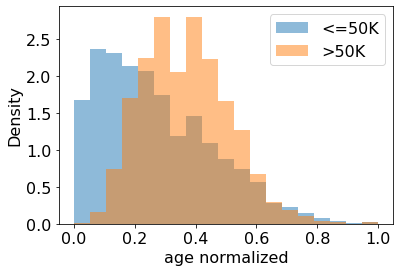

In [24]:
# plot feature distribution based on income
feature_idx = 0 # age

if t == 'zscore':
    bins = np.linspace(-2, 4, 40)
elif t == 'normalized':
    bins = np.linspace(0, 1, 20)
else:
    bins = 20

inc0_idx = train_y == 0
inc1_idx = train_y == 1

plt.hist(train_x[inc0_idx,feature_idx], bins, density=True, alpha=0.5, label=income_list[0])
plt.hist(train_x[inc1_idx,feature_idx], bins, density=True, alpha=0.5, label=income_list[1])

plt.xlabel('{} {}'.format(col_names[feature_idx], t))
plt.ylabel('Density')

plt.legend(loc='upper right')
plt.show()

## [Task 3] (20 points): Correlations

### [Task 3a] (5 points) Plot a heatmap of (pairwise) correlation between features and labels (see exercise 1)

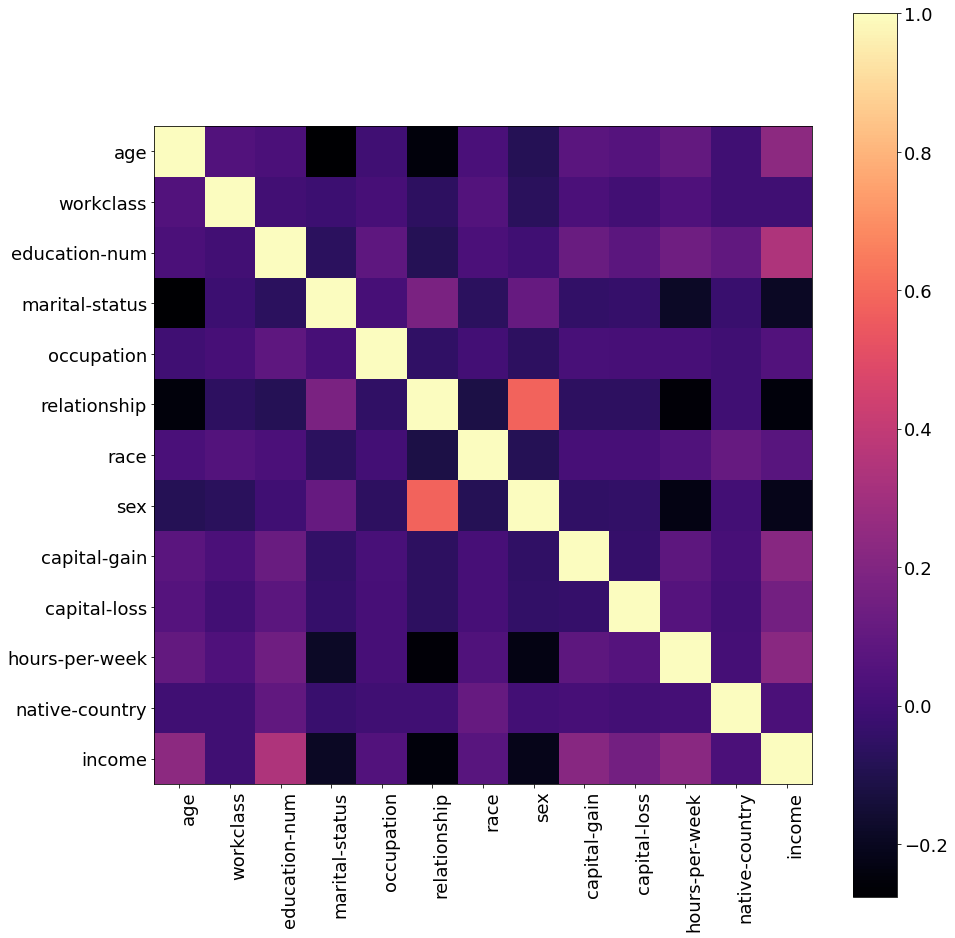

In [25]:
### Hint: make sure you compute all pairwise correlation and use plots.heatmap()! ###
###* Put your code here *###

train_xy = np.hstack((train_x, train_y.reshape(-1, 1)))

pairwise_corr = np.corrcoef(train_xy, rowvar=False)

plots.heatmap(pairwise_corr, col_names, col_names, rot=90, fsz=(14, 14))

### [Task 3b] (10 points) What do you observe? Which features are correlated with the label?

In [26]:
###* Put your answer as a comment here ###
#
# Answer: Based on my observation, the label(income) is mostly correlated with age, education-num, capital-gain, hours-per-week.
# besides that, it seems that the income would not be affected by the marital-status, relationship, and the sex.


### [Task 3c] (5 points) Given that some features like workclass, marital-status, race, sex are categorical, is the Pearson correlation coefficient a good measure of statistical relationship? If yes, explain why. If not, explain why not *and* propose (in brief) an alternative.

In [27]:
###* Put your answer as a comment here ###
### If you need to refer to some external resource/link, please cite it properly ###
#
# Answer: No, for categorical featrues, Pearson correlatin coefficient is not a good measure of statistical relationship.
# Because Pearson correlation measures if two variable are moving together, and to what degree. However, there is no order in categorical variables.
# An alternative way to measure statistical relationship between categrotical features is using association tests like Chi square and ANOVAs.
# 

## Part 2: Let's train some models!

## [Task 4] (30 points): Learning Curves

### [Task 4a] (10 points): Complete the definition of the subsample_train_eval function which repreatedly trains a model using a subset of the train data and calculates training & validation accuracy

In [28]:
from sklearn.base import clone

def model_accuracy(model, x, true_y):
    pred = model.predict(x)
    return np.sum(pred == true_y) / true_y.shape[0]

###* Put your code in the function below *###
def subsample_train_eval(model, train_x, train_y, val_x, val_y, sample_size, num_repeats=10):
    
    train_accs = np.zeros((num_repeats,1))
    val_accs = np.zeros_like(train_accs)
    
    rng = np.random.default_rng()
    for i in range(0, num_repeats):
        m = clone(model) # clone the model
        
        # take 'sample_size' random records from train_x (and train_y) and fit model m on it
        # make sure your code gives you a different random subset each time (hint: use 'rng')!
        ###* Put your code here *###
        pi = rng.permutation(train_x.shape[0])
#         print("---------%s---------"%i)
#         print("pi[:5]: ", pi[:5])
        
        tr_x = train_x[pi[:sample_size]]
        tr_y = train_y[pi[:sample_size]]
        
        m.fit(tr_x, tr_y)
    
        ### store the sample dataset in 'tr_x' and 'tr_y'
        
        # get the accuracies
        train_accs[i] = model_accuracy(m, tr_x, tr_y)
        val_accs[i] = model_accuracy(m, val_x, val_y)
        
    return train_accs, val_accs

In [29]:
def plot_learning_curve(model_instance, model_name, train_x, train_y, val_x, val_y, train_szs=None):
    
    if train_szs is None:
        train_szs = np.array([25, 50, 100, 200, 300, 500, 750, 1000, 1500, 2000])
        
    num_datapoints = train_szs.shape[0]
    accs = np.zeros((num_datapoints,2))
    laccs = np.zeros((num_datapoints,2))
    uaccs = np.zeros((num_datapoints,2))
    
    sys.stdout.write('Plotting')

    for i, tsz in enumerate(train_szs):
        
        nr = 20 if tsz <= 1000 else 10
        train_accs, val_accs = subsample_train_eval(model_instance, train_x, train_y, val_x, val_y, tsz, num_repeats=nr)
        
        train_acc = np.mean(train_accs)
        train_acc_std = np.std(train_accs)
        
        accs[i,0] = train_acc
        laccs[i,0] = train_acc - train_acc_std
        uaccs[i,0] = train_acc + train_acc_std
        
        val_acc = np.mean(val_accs)
        val_acc_std = np.std(val_accs)
        
        accs[i,1] = val_acc
        laccs[i,1] = val_acc - val_acc_std
        uaccs[i,1] = val_acc + val_acc_std
        
        sys.stdout.write('.')
        sys.stdout.flush()
    print()
    
    fig, ax = plt.subplots(figsize=(15,8))

    plt.fill_between(train_szs, laccs[:,0]*100.0, uaccs[:,0]*100.0, color='r', alpha=0.3)
    plt.fill_between(train_szs, laccs[:,1]*100.0, uaccs[:,1]*100.0, color='b', alpha=0.3)
    
    plt.plot(train_szs, accs[:,0]*100.0, 'ro-', linewidth=3, label='Training')
    plt.plot(train_szs, accs[:,1]*100.0, 'bs--', linewidth=3, label='Validation')

    ax.set_xlim(0, np.max(train_szs))
    ax.set_ylim(65, 104)
    ax.set_xlabel('Number of training examples')
    ax.set_ylabel('Accuracy')
    ax.set_title('Learning Curves for {}'.format(model_name))

    plt.legend()

    plt.show()

### [Task 4b] (10 points): Complete the code of the cell below to plot the learning curves

Plotting..........


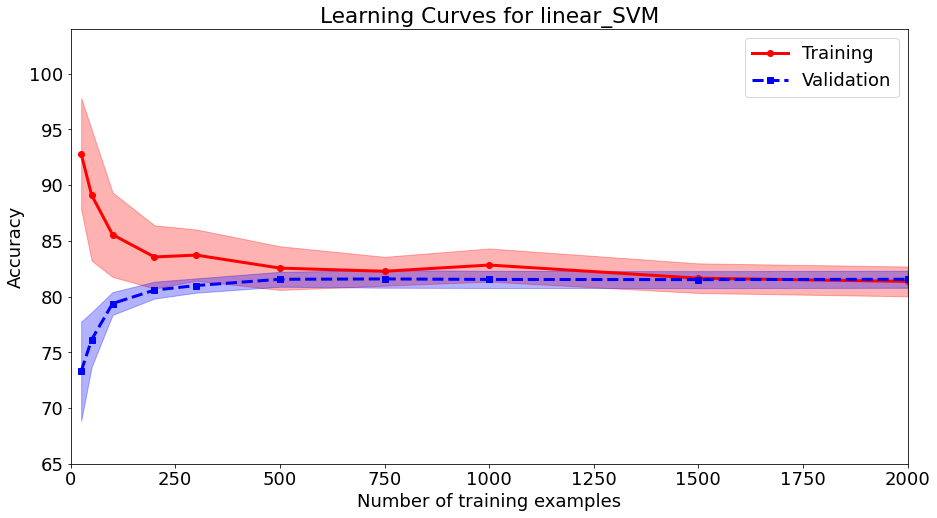

Plotting..........


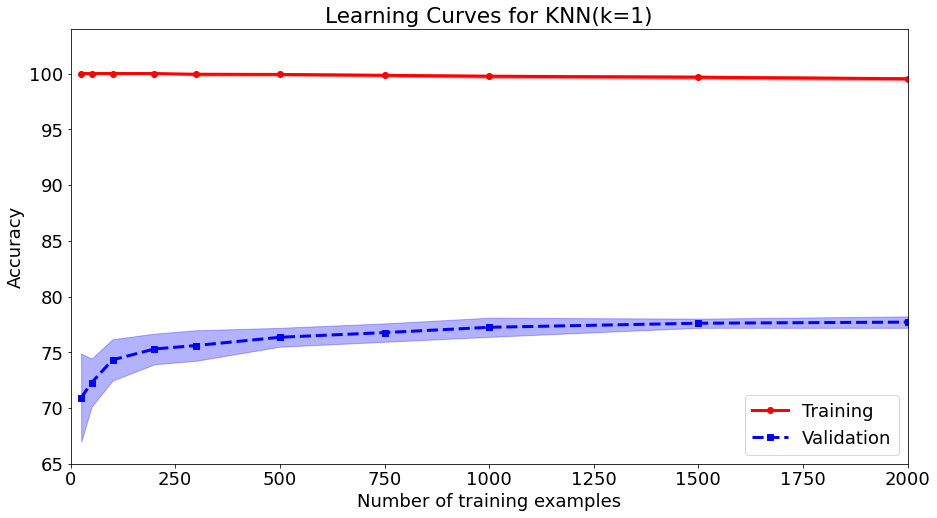

In [30]:
# Let's import what we need from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

# grab the zscore normalized version of the data
train_x, train_y, test_x, test_y, val_x, val_y = grab_data('zscore')

###* put your code here: instantiate a linear SVM model (SVC with a linear kernel) with default hyperparameters and plot its learning curve *###
###* note: you just need to call 'plot_learning_curve' with the correct arguments
svm = SVC(kernel='linear', random_state=seed)    
plot_learning_curve(svm, 'linear_SVM', train_x, train_y, val_x, val_y, train_szs=None)
    
###* put your code here: instantiate a KNN (k=1) model with default hyperparameters and plot its learning curve *###
###* note: again, you just need to call 'plot_learning_curve' with the correct arguments
knn = KNeighborsClassifier(n_neighbors=1)
plot_learning_curve(knn, 'KNN(k=1)', train_x, train_y, val_x, val_y, train_szs=None)

### [Task 4c] (10 points): What can you conclude about the size of the training data necessary for both the SVM model and the KNN model? If you had to choose between the SVM and the KNN, which would you pick and why?

In [31]:
###* Put your answer as a comment ###
#
# Answer: From the above learning curves of the SVM and the KNN, I can conclude that, for both SVM and KNN, 
# a larger size of training data is not necessary when it reaches around 500 examples, 
# because the validation accuracy barely grow since then.
#
# If I had to choose between the SVM and KNN, I would pick SVM because it has a higher validation accuracy when train over 500 examples.


## [CIS6930 Additional Task -- Task 5] (25 points): Analysis of feature engineering

### [Task 5a] (10 points): Train SVM and kNN models as in Task 4 for min-max normalized and zscore normalized features (not one-hot encoded) and compare them (print accuracies, bar plot, whatever you think is appropriate). Use the the training set (no learning curves). What do you conclude and why?

In [32]:
# Note: you can use evaluate_model() provided above (or you can do something else) for Tasks 5a and/or 5b #
def evaluate_model(name, model, train_x, train_y, val_x, val_y):
    train_acc = model_accuracy(model, train_x, train_y)
    val_acc = model_accuracy(model, val_x, val_y)
    print('[{}] Training accuracy: {:.2f}%, Validation accuracy: {:.2f}%'.format(name, train_acc*100, val_acc*100))
    

###* Put your code here *###
###* The SVM model: SVC(kernel='linear')
###* The KNN model: KNeighborsClassifier(n_neighbors=1)
###* Use 'grab_data' to get the feature engineered data you need  *###
#

# grab the min-max normalized version of the data
normalized_train_x, normalized_train_y, normalized_test_x, normalized_test_y, normalized_val_x, normalized_val_y = grab_data('normalized')
# grab the min-max normalized version of the data
zscored_train_x, zscored_train_y, zscored_test_x, zscored_test_y, zscored_val_x, zscored_val_y = grab_data('zscore')

svm_normalized = SVC(kernel='linear', random_state=seed)
svm_zscored = clone(svm_normalized)

svm_normalized.fit(normalized_train_x, normalized_train_y)
svm_zscored.fit(zscored_train_x, zscored_train_y)

knn_normalized = KNeighborsClassifier(n_neighbors=1)
knn_zscored = clone(knn_normalized)

knn_normalized.fit(normalized_train_x, normalized_train_y)
knn_zscored.fit(zscored_train_x, zscored_train_y)


evaluate_model('SVM (w/ min-max normalized features)', svm_normalized, normalized_train_x, normalized_train_y, normalized_val_x, normalized_val_y)
evaluate_model('SVM (w/ zscore normalized features)', svm_zscored, zscored_train_x, zscored_train_y, zscored_val_x, zscored_val_y)
evaluate_model('KNN (w/ min-max normalized features)', knn_normalized, normalized_train_x, normalized_train_y, normalized_val_x, normalized_val_y)
evaluate_model('KNN (w/ zscore normalized features)', knn_zscored, zscored_train_x, zscored_train_y, zscored_val_x, zscored_val_y)


[SVM (w/ min-max normalized features)] Training accuracy: 81.19%, Validation accuracy: 81.38%
[SVM (w/ zscore normalized features)] Training accuracy: 81.07%, Validation accuracy: 81.41%
[KNN (w/ min-max normalized features)] Training accuracy: 96.82%, Validation accuracy: 79.18%
[KNN (w/ zscore normalized features)] Training accuracy: 96.87%, Validation accuracy: 79.62%


In [33]:
###* Put your answer (what do you conclude and why?) as a comment here ###
# Answer: From the above results, I can see that the validation accuracy of both SVM and KNN is higher when using zscore normalization than using min-max normalization.
# So my conclusion is that zscore normalization is better than the min-max normalization.
# The reason behind it might be zscore normalization is better at deal with outliers in the data than the min-max normalization, and there are many outliers in this dataset.
#
# And I can also conclude that the SVM is better than the KNN at this task, because no matter which normalization I'm using, the validation accuracy of SVM is higher than the KNN's. 

### [Task 5b] (15 points): Now repeat the analysis but this time compare the one-hot encoded features to non-one-hot encoded features. Use the full training set (no learning curves). What is the impact on the models (for both SVM & kNN) of one-hot encoding? Briefly comment on your findings.

In [34]:
###* Put your code here *###
#
#
# grab the min-max normalized one-hot version of the data
onehot_n_train_x, onehot_n_train_y, onehot_n_test_x, onehot_n_test_y, onehot_n_val_x, onehot_n_val_y = grab_data('onehot_n')
# grab the zscore normalized version of the data
onehot_z_train_x, onehot_z_train_y, onehot_z_test_x, onehot_z_test_y, onehot_z_val_x, onehot_z_val_y = grab_data('onehot_z')

svm_onehot_n = SVC(kernel='linear', random_state=seed)
svm_onehot_z = SVC(kernel='linear', random_state=seed)

svm_onehot_n.fit(onehot_n_train_x, onehot_n_train_y)
svm_onehot_z.fit(onehot_z_train_x, onehot_z_train_y)

knn_onehot_n = clone(knn_normalized)
knn_onehot_z = clone(knn_normalized)

knn_onehot_n.fit(onehot_n_train_x, onehot_n_train_y)
knn_onehot_z.fit(onehot_z_train_x, onehot_z_train_y)

evaluate_model('SVM (w/ min-max normalized features)', svm_normalized, normalized_train_x, normalized_train_y, normalized_val_x, normalized_val_y)
evaluate_model('SVM (w/ min-max normalized & one-hot encoded features)', svm_onehot_n, onehot_n_train_x, onehot_n_train_y, onehot_n_val_x, onehot_n_val_y)
print("----------")
evaluate_model('SVM (w/ zscore normalized features)', svm_zscored, zscored_train_x, zscored_train_y, zscored_val_x, zscored_val_y)
evaluate_model('SVM (w/ zscore normalized & one-hot encoded features)', svm_onehot_z, onehot_z_train_x, onehot_z_train_y, onehot_z_val_x, onehot_z_val_y)

print("\n##########################\n")

evaluate_model('KNN (w/ min-max normalized features)', knn_normalized, normalized_train_x, normalized_train_y, normalized_val_x, normalized_val_y)
evaluate_model('KNN (w/ min-max normalized & one-hot encoded features)', knn_onehot_n, onehot_n_train_x, onehot_n_train_y, onehot_n_val_x, onehot_n_val_y)
print("----------")
evaluate_model('KNN (w/ zscore normalized features)', knn_zscored, zscored_train_x, zscored_train_y, zscored_val_x, zscored_val_y)
evaluate_model('KNN (w/ zscore normalized & one-hot encoded features)', knn_onehot_z, onehot_z_train_x, onehot_z_train_y, onehot_z_val_x, onehot_z_val_y)



[SVM (w/ min-max normalized features)] Training accuracy: 81.19%, Validation accuracy: 81.38%
[SVM (w/ min-max normalized & one-hot encoded features)] Training accuracy: 84.94%, Validation accuracy: 84.89%
----------
[SVM (w/ zscore normalized features)] Training accuracy: 81.07%, Validation accuracy: 81.41%
[SVM (w/ zscore normalized & one-hot encoded features)] Training accuracy: 84.89%, Validation accuracy: 85.14%

##########################

[KNN (w/ min-max normalized features)] Training accuracy: 96.82%, Validation accuracy: 79.18%
[KNN (w/ min-max normalized & one-hot encoded features)] Training accuracy: 96.91%, Validation accuracy: 79.50%
----------
[KNN (w/ zscore normalized features)] Training accuracy: 96.87%, Validation accuracy: 79.62%
[KNN (w/ zscore normalized & one-hot encoded features)] Training accuracy: 96.93%, Validation accuracy: 80.45%


In [35]:
###* Put your answer (i.e., comment on your findings) as a comment ###
#
# Answer: I find that, for both SVM and KNN, using one-hot encoded features have higher validation accuracy than using the non-one-hot encoded features.
# Based on my finding, I think one-hot encoding is better than the ordinal encoding for the categorical features.
# It is because categorical features do not have an order or rank, however, when ordinal encoding is performed, the catgorical features are ranked with integer numbers, such ranking relations may confuse the model.
